# <center>Network Science</center>

## <center/>Course Project #2

### <center>Student: Kireev Ruslan</center>

#### <hr /> General Information

**Due Date:** 17.06.2016 23:59 <br \>
**Late submission policy:** no grade <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2016] *{LastName}* *{First Name}* Project*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Description

### Data

As a dataset to analyse you can choose one option in the following list:
1. Real Dataset (can be found [here](http://snap.stanford.edu/) or [here](http://konect.uni-koblenz.de/networks/))
2. Generated Dataset. Use more complex structure rather than just a simple ER model. For instance, you may consider multilevel network, where on the lower level you have several Watts-Strogatz graphs and on the upper level these graphs are respesented as randomly connected nodes.
3. Your data mined from Social Networks, Twitter, LiveJournal e.t.c.

**The order of your dataset should be no less than $10^4$ nodes**

### Models

Consider one of the following models:
1. SIR-based (or another with more than 3 letters) epidemic model
2. Independent Cascade Model
3. Linear Threshold Model

### Tasks

#### Network Descriptive Analysis

Provide information on your netowork: Source, Descriptive Statistics, Visualization

#### Main Task for model (1)

You are in charge of leading the vaccination campaign against some outbroken nonlethal disease. You have options to vactinate or provide medical treatment to infected ones. However, everything has its costs:
* Vaccination of a node costs $500 \$$ and make it immune to the disease all life-long. Unfortunately, you can help this way only to no more than $10\%$ of your population
* Medical Treatment costs $120\$$ per day of illness period, which in turn may take from $3$ to $7$ days

Your task is to implement the simulation model, propose some vaccination strategies and compare them.

#### Main Task for models (2-3)

You are running the marketing campaign for brand new pocket device. Initially you can sign contracts with a few people to advertize your gadget among their neigbours. The more "famous" person you are picking the greater price appears in the contract.
* Contract cost can be calculated as $300 \$ \times \text{NN}(i)$, where $\text{NN}(i)$ is size of the neigbourhood of the person $i$.
* You earn $250\$$ per each affected person

Your task is to maximize your influence and maximize profit of your campaign

#### Part 1

The dataset http://konect.uni-koblenz.de/networks/escorts was chosen. The description of the graph is presented on the site. 
It is a bipartite graph with 16,730 = 10,106 (buyers) + 6,624 (escorts) vertices and 50,632 edges, each edge has its weight (rating of the sexual intercourse quality). So, there are multiedges possible. The graph is not connected, the largest component consists of 15810 nodes.
This particular graph could be interesting in the sense of investigating, how sexually transmitted diseases spread.  

In [121]:
import networkx as nx
import random
from copy import deepcopy 
import matplotlib.pyplot as plt

%matplotlib inline

Read the graph from the file:

In [571]:
G=nx.MultiGraph()
with open('out.escorts') as f:
    lines = f.readlines()
for line in lines:
    a = 'b'+line.split()[0]
    b = 'e'+line.split()[1]
    w = (int(line.split()[2])+1)/3 # probabilities for the part 2
    w = (random.random()+w)/30 
    G.add_edge(a,b, weight=w)
print nx.is_connected(G)
comps_len = []
for g in nx.connected_components(G):
    comps_len.append(len(g))
print comps_len

False
[15810, 2, 6, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 4, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 5, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 8, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 3, 2, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

The SIR model was considered. First, we need to decide, which of the people we vaccinate. Then this group is excluded from the model, because they cannot be infected. Afterwards, the standard SIR model runs on the remain nodes. The paremeters are $\beta$ -- probability of being infected, $V$ -- vaccination group, $I_{part}$ -- initial part of infected, $\tau$ -- days of being infected (random value from 3 to 7). This is the model simulation function:

In [469]:
def simulation(G, T, beta, I_part, V): # input: a graph, number of days, infection probability, vaccination group
    S = set(G.nodes()) # susceptible
    V = set(V)
    S = S - V # vaccinated are excluded
    I = set(random.sample(S, len(S)/I_part)) # random subset of the number of nodes are infected
    tau = {} # dict, where key is a node, and the value is a list of two elems, where 
             # the first value is a day counter, how many day the node is infected, 
             # the second, how long he will be infected, from 3 to 7 days
    for node in I:
        days = random.randint(3, 7)
        tau[node]=[0, days]
    S = S - I
    R = set() # Recovered with immune
    treatment_costs = 0
    st, it, rt = [], [], []
    for t in range(0,T):
        # firstly check, if there someone who recovers
        for node in tau:
            tau[node][0] += 1
            if tau[node][0] == tau[node][1]:
                I = I - set([node])
                R.add(node)
                
        treatment_costs += 120*len(I) # treatment costs: 120 per day per each patient
        Itemp = deepcopy(I)
        # each infected at this time infects its neighbors with probability beta
        for node in Itemp:
            for neighbor in G.neighbors(node):
                prob = random.random()
                if prob < beta:
                    if neighbor in S:
                        S = S - set([neighbor])     # if the neighbor gets infected it gets excluded from susceptible
                        I.add(neighbor)             # and included in infected
                        days = random.randint(3, 7)
                        tau[neighbor]=[0, days]     # start counting days
    
        st.append(len(S))  
        it.append(len(I))
        rt.append(len(R))
        
    return st, it, rt, treatment_costs + 500*len(V)

Let's check, how this works. The settings: probability -- 0.3, 16730/1000 = 16 random nodes are vaccinated, (16730-16)/20 = 835 are initially infected. Simulation time period is 30 days

6466520


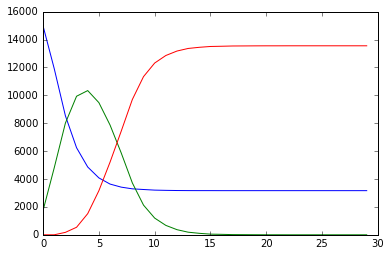

In [527]:
st, it, rt, costs = simulation(G, 30, 0.3, 20, random.sample(set(G.nodes()), len(set(G.nodes()))/1000))
print costs
plt.plot(st)
plt.plot(it)
plt.plot(rt)
plt.show()

The costs of the whole desease are dependent on the nodes are being vaccinated, their number and type. We need to chose some important nodes to vaccinate. That's why we will try several importance metrics: degree and betweenness centrality, HITS and PageRank.

In [471]:
bet_centrality = sorted(nx.betweenness_centrality(G,k=G.number_of_nodes()/100).items(), key=lambda x: x[1], reverse=True)
for i in range(len(bet_centrality)):
    bet_centrality[i] = bet_centrality[i][0]

In [475]:
h,a=nx.hits(nx.Graph(G)) # only hubs considered, since h=a
hub = sorted(h.items(), key=lambda x: x[1], reverse=True)
for i in range(len(hub)):
    hub[i] = hub[i][0]

In [476]:
deg_centrality = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)
for i in range(len(deg_centrality)):
    deg_centrality[i] = deg_centrality[i][0]

In [477]:
pagerank = sorted(nx.pagerank(nx.Graph(G)).items(), key=lambda x: x[1], reverse=True)
for i in range(len(hub)):
    pagerank[i] = pagerank[i][0]

Besides, the strategy of vaccination should account the initial number of infected and how the desease is contagious. 
For this purpose we very the parameters. Infection parts goes from very high to low (1/2 -- very high, 1/10 -- high, 1/100 -- medium, 1/1000 $-$ low). Contagiousness from low to high (0.2 -- low, 0.5 -- medium, 0.95 -- high). We investigate, how the number of vaccinated affects the costs. Empirically stated, that within 30 days the infection ends with every possible setting among the above mentioned.

In [478]:
def compare_strategies(G, V=[]):
    res = {}
    for I_part in [2, 10, 100, 1000]:
        for beta in [0.2, 0.5, 0.95]:
            arr = []
            for k_vac in [10, 100, 1000, 1600]:
                if not V:
                    V = random.sample(set(G.nodes()), k_vac)
                st, it, rt, costs = simulation(G, 30, beta, I_part, V[:k_vac])
                arr.append(costs)
            res[(I_part, beta)] = arr
    return res

In [479]:
random_vac = compare_strategies(G)
pagerank_vac = compare_strategies(G, V=pagerank)
hub_vac = compare_strategies(G, V=hub)
deg_centrality_vac = compare_strategies(G, V=deg_centrality)
bet_centrality_vac = compare_strategies(G, V=bet_centrality)

I tried to add axes in the figure below, but have not succued in it. So, x-axis stands for initial set of infected, it goes from low to very high; y-axis is for contagiousness, from low to high.
The subplots axes: x -- number of vaccineted, y -- overall costs.

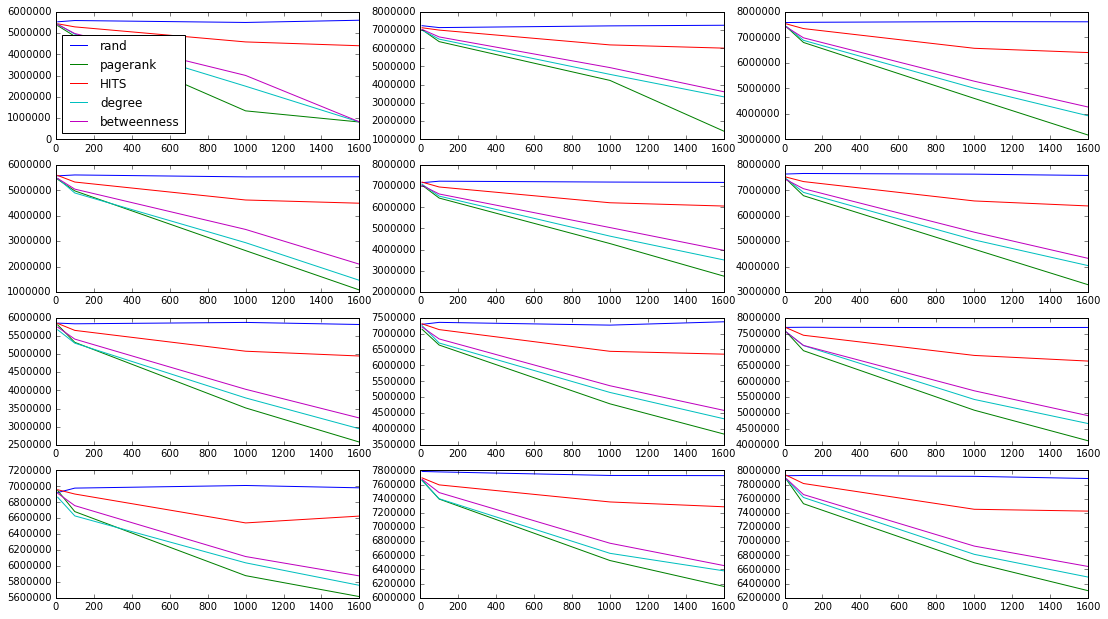

In [480]:
f, axarr = plt.subplots(4, 3)
f.set_size_inches(18.5, 10.5)
y = {0.2:0, 0.5:1, 0.95:2}
x = {2:3, 10:2, 100:1, 1000:0}
for key in random_vac:
    axarr[x[key[0]], y[key[1]]].plot([10, 100, 1000, 1600], random_vac[key], label='rand')
    axarr[x[key[0]], y[key[1]]].plot([10, 100, 1000, 1600], pagerank_vac[(key[0], key[1])], label='pagerank')
    axarr[x[key[0]], y[key[1]]].plot([10, 100, 1000, 1600], hub_vac[(key[0], key[1])], label='HITS')
    axarr[x[key[0]], y[key[1]]].plot([10, 100, 1000, 1600], deg_centrality_vac[(key[0], key[1])], label='degree')
    axarr[x[key[0]], y[key[1]]].plot([10, 100, 1000, 1600], bet_centrality_vac[(key[0], key[1])], label='betweenness')
handles, labels = axarr[0][0].get_legend_handles_labels()
axarr[0][0].legend(handles, labels, loc=0)

First thing to note is that, randomly picking to vaccinate is a bad strategy. 
Second, the more people get the vaccine, the less overall costs. This does not work for the random case. For example, the plot in the left-bottom corner corresponds to the case, when a small number of infected and small probability of transmission. The common sense says the infection will not spread alot.
Finally, vaccination of nodes with maximal PageRank is a good strategy. 

#### Part 2
Considere Independent cascade model. The simulation function takes two arguments: a graph and an initial set of active nodes. The escort network already has weights of its edges, so we tried to account this information. Since logically the better rating of the edge, the easier to activate the nodes of the edge from each other. Worth noting that, the positive ratings are significantly more. 
So the probability of activation calculates the following way: ratings set {-1, 0, 1} -> ({-1, 0, 1}+1)/3 -> {0, 1/3, 2/3}, then 
we add a random probability to the weight and divide it 30. The logic is straightforward: the mean weight of the positive rating edges must be bigger than neutral and negative, and neutral -- bigger than negative. The denominator was chosen empirically, to control the "depth" of diffusion (to make the greedy optimization run faster actually)

Recall, that the graph has multiple edges. So, the more edges between two nodes the more probability to activate.

In [577]:
print 'Partition of multiple edges: ', 1-1.0*nx.Graph(G).number_of_edges()/G.number_of_edges()

Partition of multiple edges:  0.228867119608


In [569]:
def simulation_contract(G, A):
    if not A:
        return 0, 0
    N = set(G.nodes()) 
    A = set(A) # active nodes
    N = N - A # not affected nodes
    loss = 0
    for node in A:
        loss += 300*G.degree(node)
    Aall = set() # affected nodes
    while A:
        Atemp = deepcopy(A)
        A = set() # single chance to activate
        for node in Atemp:
            for neighbor in G.neighbors(node):
                if neighbor in N:
                    prob = random.random()
                    p_vw = G[node][neighbor][0]['weight']
                    for key in G[node][neighbor]:                # since G is a multigraph, the more edges between two nodes
                        p_vw += G[node][neighbor][key]['weight'] # the more probability to activate
                    if prob < p_vw: # try to activate the neighbor
                        N = N - set([neighbor])
                        A.add(neighbor)
                        Aall.add(neighbor)
    
    profit = 250*len(Aall)-loss
    return profit, len(Aall)

The greedy optimization algorithm from the lectures was implemented. We want to maximize not only influence, but also  profit of the campaign. So istead of finding $k$ initial nodes, we find them until the profit grows. Moreover we try to find the node that maximizes both influence and profit. 

In [573]:
def greedy(G):
    S = set() # initial set
    dprofit = 0 # profit difference before and after adding a node
    profit = 0
    while dprofit>=0:
        argmax = ''
        infmax = 0 # maximal influence
        profit_max = 0 # maximal profit
        for u in (set(G.nodes())-S): # finding the node, that maximizes influence and profit
            a, b = simulation_contract(G, S | set([u]))
            if (b > infmax) and (a > profit_max):
                infmax = b
                profit_max = a
                argmax = u
            
        dprofit = profit_max - profit
        if dprofit<0:
            break
        S.add(u)
        profit = profit_max
        print S, profit, infmax
    return S, profit

Due to the fact, that node activation event is probabilistic. Different runs gives a quite different results. Here is presented the biggest initial set I get:

In [590]:
greedy(G)

set(['e6049']) 112800 468
set(['e6049', 'b3747']) 121250 503
set(['e6049', 'b3747', 'b3647']) 121250 491
set(['e6049', 'e6223', 'b3747', 'b3647']) 128600 530
set(['b2855', 'e6049', 'e6223', 'b3747', 'b3647']) 136350 561


({'b2855', 'b3647', 'b3747', 'e6049', 'e6223'}, 136350)

Hence, the maximal influence is 561 and maximal profit is 136350. 

Let's compare this results to the case, when we use PageRank top nodes, say 1000 of them.

In [599]:
def greedyPR(G):
    S = set() 
    dprofit = 0
    profit = 0
    while dprofit>=0:
        argmax = ''
        infmax = 0 
        profit_max = 0 
        for u in pagerank[:1000]: # <---- PageRank
            a, b = simulation_contract(G, S | set([u]))
            if (b > infmax) and (a > profit_max):
                infmax = b
                profit_max = a
                argmax = u
            
        dprofit = profit_max - profit
        if dprofit<0:
            break
        S.add(u)
        profit = profit_max
        print S, profit, infmax
    return S, profit

In [600]:
greedyPR(G)

set(['b9445']) 103300 490


({'b9445'}, 103300)

Consequently, use of PageRank nodes are not a such good decision.